<a href="https://colab.research.google.com/github/saswatisamal/PythonWithGenAI/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt
#The y_train and y_test is excluded as we are comparing the decoded image that model will give after encoding original image . Use _ to ignore the test and train label data. It is a kind of unsupervised learning
(x_train,_),(x_test,_)=tf.keras.datasets.mnist.load_data()
#Normalize the data
x_train=x_train/255.0
x_test=x_test/255.0

#Since we will pass through convolution layer so the input needs to be in certain format (batch,width,height,channel)
x_train=np.expand_dims(x_train,axis=(-1))
x_test=np.expand_dims(x_test,axis=(-1))

#Write the encoding or blurring of image code
encoder=models.Sequential([layers.InputLayer(input_shape=(28,28,1)),
                           layers.Conv2D(32,(3,3),activation='relu',padding='same',strides=2),
                           layers.Conv2D(64,(3,3),activation='relu',padding='same',strides=2),
                           layers.Flatten(),
                           layers.Dense(64,activation='relu')
])


#Write the decoding or sharpening the image  code
#Conv2DTranspose upscales the imaage by no of strides
decoder=models.Sequential([layers.InputLayer(input_shape=(64,)),
                           layers.Dense(7*7*64,activation='relu'),
                           layers.Reshape((7,7,64)),
                           layers.Conv2DTranspose(64,(3,3),strides=2,activation='relu',padding='same'),
                           layers.Conv2DTranspose(32,(3,3),strides=2,activation='relu',padding='same'),
                           layers.Conv2DTranspose(1,(3,3),activation='sigmoid',padding='same') ])

autoencoder = models.Sequential([encoder,decoder])
autoencoder.summary()





11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
encoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,584 (857.75 KB)

 Trainable params: 219,584 (857.75 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 3136)           │       203,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,521 (1013.75 KB)

 Trainable params: 259,521 (1013.75 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
autoencoder.fit(x_train, x_train, epochs=5, batch_size=128, validation_data=(x_test, x_test))


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 0.2776 - val_loss: 0.0887
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0858 - val_loss: 0.0776
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0773 - val_loss: 0.0742
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0745 - val_loss: 0.0727
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0727 - val_loss: 0.0715


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


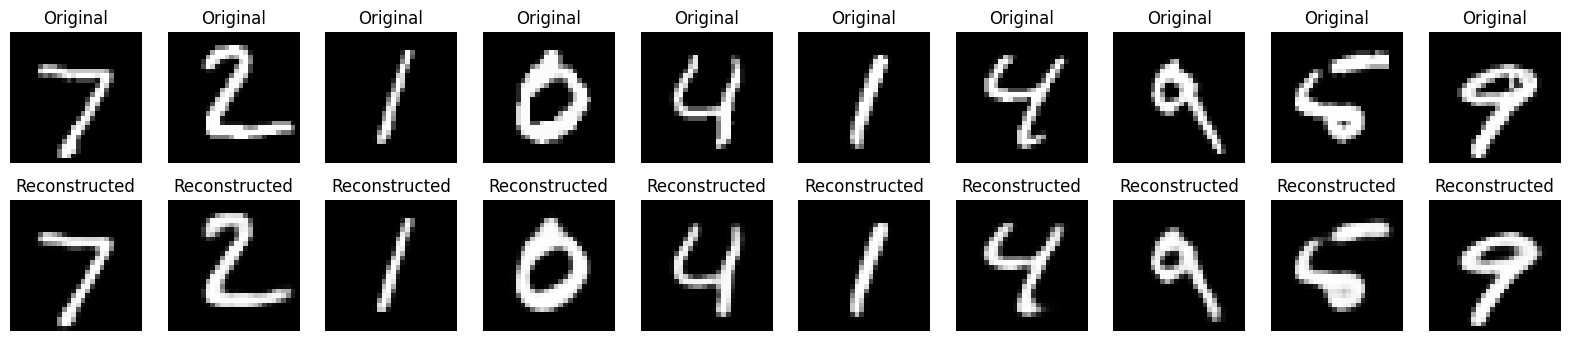

In [7]:
decoded_images = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title("Original")
    plt.gray()
    ax.axis('off')

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_images[i].reshape(28,28), cmap="gray")
    plt.title("Reconstructed")
    plt.gray()
    ax.axis('off')

plt.show()